#**Exercise (part 1) about:**
## ✓ Data Pipelines.
## ✓ NoSQL database connection.
## ✓ Use and connection in APIs.
## ✓ Data Lake in S3 AWS.
## ✓ Distributed data processing.

***Install and manage software packages for the exercice***

In [ ]:
!pip install ibge # package from Pypi (Collection of APIs for the IBGE [Brazilian Institute of Geography and Statistics] Data Services in Brazil)
!pip install boto3 # For connection with AWS S3
!pip install pymongo[srv] # For connection with mongodb in cloud. 

**Importing modules to be used**

In [ ]:
from ibge.localidades import *
import pandas as pd
import boto3
import pymongo

**Assigning and testing ibge loading**

In [3]:
dataRegiao = Regioes()
dataRegiao.count()

5

In [4]:
dataEstado = Estados()
dataEstado.count()

27

In [5]:
dataMunicipio = Municipios()
dataMunicipio.count()

5570

In [6]:
dataRegiao.json()

[{'id': 1, 'nome': 'Norte', 'sigla': 'N'},
 {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
 {'id': 3, 'nome': 'Sudeste', 'sigla': 'SE'},
 {'id': 4, 'nome': 'Sul', 'sigla': 'S'},
 {'id': 5, 'nome': 'Centro-Oeste', 'sigla': 'CO'}]

In [7]:
dataEstado.json()

[{'id': 11,
  'nome': 'Rondônia',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'RO'},
 {'id': 12,
  'nome': 'Acre',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AC'},
 {'id': 13,
  'nome': 'Amazonas',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AM'},
 {'id': 14,
  'nome': 'Roraima',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'RR'},
 {'id': 15,
  'nome': 'Pará',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'PA'},
 {'id': 16,
  'nome': 'Amapá',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'AP'},
 {'id': 17,
  'nome': 'Tocantins',
  'regiao': {'id': 1, 'nome': 'Norte', 'sigla': 'N'},
  'sigla': 'TO'},
 {'id': 21,
  'nome': 'Maranhão',
  'regiao': {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
  'sigla': 'MA'},
 {'id': 22,
  'nome': 'Piauí',
  'regiao': {'id': 2, 'nome': 'Nordeste', 'sigla': 'NE'},
  'sigla': 'PI'},
 {'id': 23,
  'nome': 'Ceará',
  'regiao': {'id': 2,

In [ ]:
dataMunicipio.json()

**Connect to database in Mongodb Cloud**

In [9]:
client = pymongo.MongoClient("mongodb+srv://<user>:<password>@unicluster.ixhvw.mongodb.net/ibge?retryWrites=true&w=majority")

In [10]:
banco = client.ibge
album = banco.pnadc20203
album.find_one()

{'_id': ObjectId('600ce0685daa95c6616007ac'),
 'ano': 2020,
 'anosesco': 0.0,
 'cor': 'Parda',
 'graduacao': None,
 'horastrab': None,
 'idade': 62,
 'ocup': None,
 'renda': None,
 'sexo': 'Mulher',
 'trab': 'Pessoas fora da força de trabalho',
 'trimestre': 3,
 'uf': 'Acre'}

**Downloading the pnadc20203 (in database ibge) collection and converting it to the csv file**

In [11]:
df = pd.DataFrame(list(album.find())).drop(['_id'], axis=1)
df.to_csv('pnadc20203.csv', index=False)


**Extracting the Region, State and county of ibge API and converting to csv**

In [12]:
df = pd.DataFrame(list(dataRegiao.json())).drop(['id'], axis=1)
df.to_csv('regiao.csv', index=False)
df = pd.DataFrame(list(dataEstado.json())).drop(['id'], axis=1)
df.to_csv('estado.csv', index=False)
df = pd.DataFrame(list(dataMunicipio.json())).drop(['id'], axis=1)
df.to_csv('municipio.csv', index=False)
 
 

**Loading csv files to S3 AWS**

In [13]:
ACCESS_KEY = '<AccessKey>'
SECRET_KEY = '<SecretKey>'


def upload_to_aws(local_file, bucket, s3_file):
    s3 = boto3.client('s3', aws_access_key_id=ACCESS_KEY,
                      aws_secret_access_key=SECRET_KEY)

    try:
        s3.upload_file(local_file, bucket, s3_file)
        print("Upload Successful")
        return True
    except FileNotFoundError:
        print("The file was not found")
        return False
    except NoCredentialsError:
        print("Credentials not available")
        return False

# Uploading files with the function 'upload_to_aws' created before
uploaded = upload_to_aws('regiao.csv', 'igti-bootcamp-ed-2021-evangelista', 'regiao.csv')
uploaded = upload_to_aws('estado.csv', 'igti-bootcamp-ed-2021-evangelista', 'estado.csv')
uploaded = upload_to_aws('municipio.csv', 'igti-bootcamp-ed-2021-evangelista', 'municipio.csv')
uploaded = upload_to_aws('pnadc20203.csv', 'igti-bootcamp-ed-2021-evangelista', 'mulheres.csv')

Upload Successful
Upload Successful
Upload Successful
Upload Successful


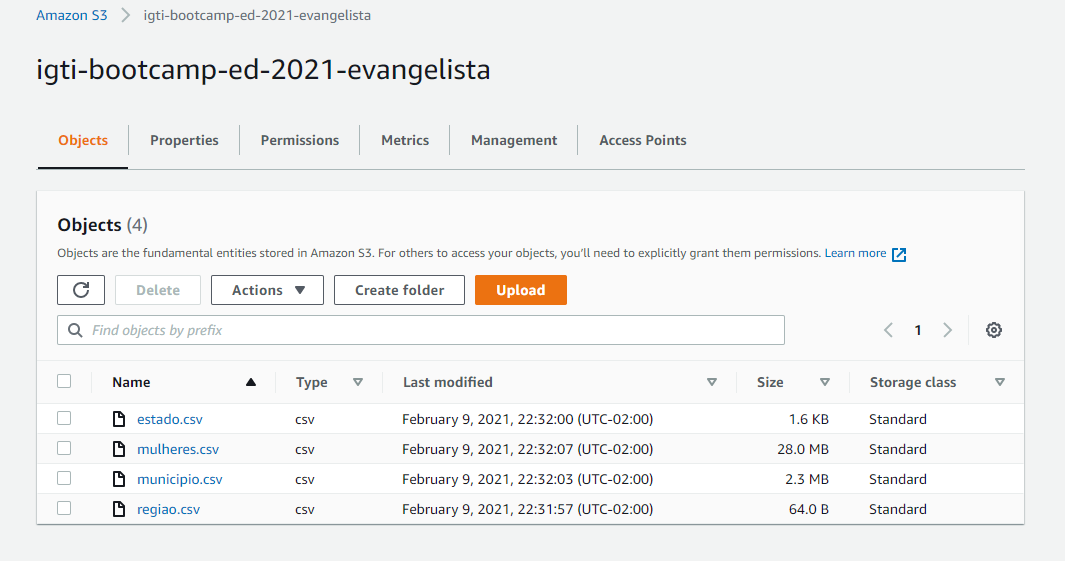

In [14]:
from IPython.display import Image
Image('Resultado.png')